# **Results extractor**
This script unifies the result extracting framework of the malenia package

In [1]:
import matplotlib.pyplot as plt
from malenia.results import Results
from sklearn.metrics import mean_absolute_error, accuracy_score, cohen_kappa_score
from malenia.results_utils import Metric

%matplotlib inline

In [2]:
##
#
RESULTS_PATH = "../results/FINAL_ordinal_experiments"
#
# DATA = "../../DATA/tsoc_separated"
#
DATA = [
    'ProximalPhalanxOutlineAgeGroup',
    'Covid3Month_5b',
    'ProximalPhalanxTW',
    'MiddlePhalanxOutlineAgeGroup',
    'EthanolLevel',
    'AppliancesEnergy_5b',
    'DistalPhalanxOutlineAgeGroup',
    'MiddlePhalanxTW',
    'EthanolConcentration',
    'AtrialFibrillation',
    'USASouthwestEnergyFlux_4b',
    'USASouthwestSWH_4b',
    'DistalPhalanxTW',
    'GOOG',
    'MSFT',
    'META',
    'AMZN',
    'AAPL',
]
#
METHODS = {
   #"METHOD-PrettyName" : ["method_name_in_results_file", hasMultivariatePredictions]
    "BOSS" : ["BOSS", False],
    "cBOSS" : ["cBoss", False],
    "WEASEL" : ["WEASEL", False],
}
#
METRICS = {
    "mae": Metric(mean_absolute_error),
    "ccr": Metric(accuracy_score),
    "qwk": Metric(cohen_kappa_score, weights="quadratic"),
}
#
SEEDS = 2
#
ROUNDING_DECIMALS = 3
#
##

In [3]:
r = Results(datasets=DATA, methods=METHODS, metrics=METRICS, results_path=RESULTS_PATH, seeds=SEEDS, rounding_decimals=ROUNDING_DECIMALS)
r.evaluate(verbose = False) ## !!! Danger with the verbose flag !!

__________________________________

### **Get results by method**

In [4]:
r.get_results_by_method()

,mae,ccr,qwk
method,,,
BOSS,0.714,0.514,0.336
cBOSS,0.701,0.519,0.333
WEASEL,0.674,0.532,0.375
O-TDE,0.642,0.538,0.386
TDE,0.638,0.544,0.387


__________________________________

### **Get wins | ties | losses** (falta corregir implementación)

In [5]:
# r.get_wins_ties_losses("mae")

__________________________________

### **Get results by dataset for a specific metric**

In [7]:
specific_metric = "mae"
r.get_results_by_dataset_metric(specific_metric)

,BOSS,cBOSS,WEASEL,TDE,O-TDE
dataset,,,,,
AAPL,1.349,1.332,1.268,1.332,1.300
AMZN,1.411,1.382,1.255,1.311,1.340
AppliancesEnergy_5b,0.731,0.577,0.675,0.524,0.524
AtrialFibrillation,0.917,0.934,0.916,0.900,0.900
Covid3Month_5b,0.730,0.778,0.730,0.754,0.786
DistalPhalanxOutlineAgeGroup,0.194,0.223,0.230,0.234,0.226
DistalPhalanxTW,0.392,0.402,0.374,0.428,0.421
EthanolConcentration,0.842,0.913,0.624,0.578,0.671
EthanolLevel,0.627,0.657,0.607,0.487,0.466


__________________________________

### Get **Critical Difference Diagram** for a specific metric

Warning! - If you rerun the cell without restarting the notebook kernel, the plot will be slightly different (idk why)

<Figure size 640x480 with 0 Axes>

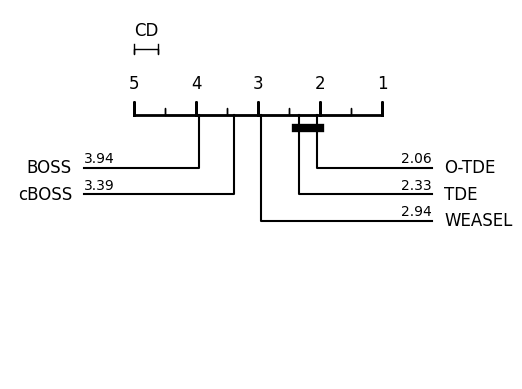

In [8]:
r.cd(
    metric_name = "mae",
    greaterIsBetter = False,
    savefile = None
)

__________________________________

### Get **Box Plot** along datasets for a specific metric

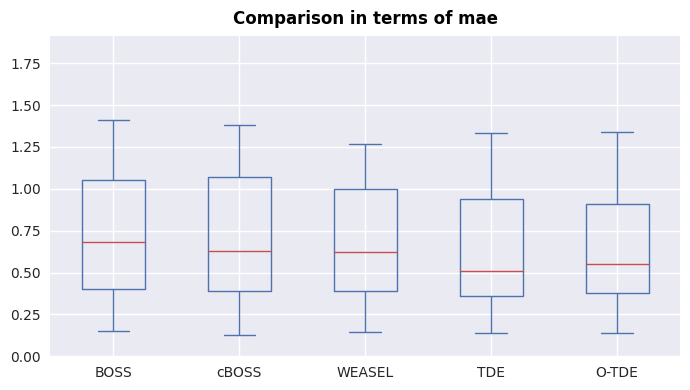

In [12]:
r.plot_Boxplot(
    metric_name = "mae",
    figsize = (7, 4)
)

__________________________________